Projeto 1: Análise Exploratória de Dados (EDA) em um Conjunto de Dados de Vendas


Etapa I (ELT)
Importacao da biblioteca pandas, do dataset e primeira verificacao de sucesso da importacao(preview do dataset)

In [85]:
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('D:\docs\py\programinhas\datasets\SampleSuperstore.csv', encoding='unicode_escape')

# Exibir as primeiras linhas do dataset
print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

Limpeza dos dados

In [86]:
#verificacao de dados nulos
print(df.isnull().sum())
#tratamento dos dados nulos/ausentes no dataset
df=df.dropna()
#verificacao e remocao de duplicatas
df.drop_duplicates(inplace=True)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Etapa II: Análise Descritiva e Visualizacao dos dados

In [87]:
#Estatística descritiva
print(df.describe())

#Análise da coluna de vendas/pedidos
print (df['Sales'].describe)

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  
<bound method NDFrame.describe of 0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
       

Visualizacao de dados

In [88]:
#importacao das bibliotecas de visualizacao dos dados
import matplotlib.pyplot as plt
import seaborn as sns

Histogramas

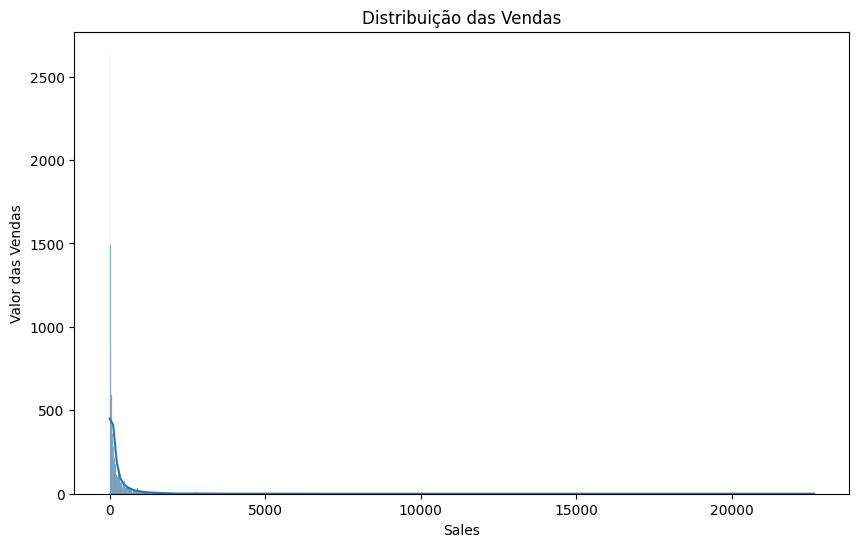

In [99]:
#tamanho da figura/histograma de distribuição de vendas
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribuição das Vendas')
plt.xlabel('Sales')
plt.ylabel('Valor das Vendas')
plt.show()

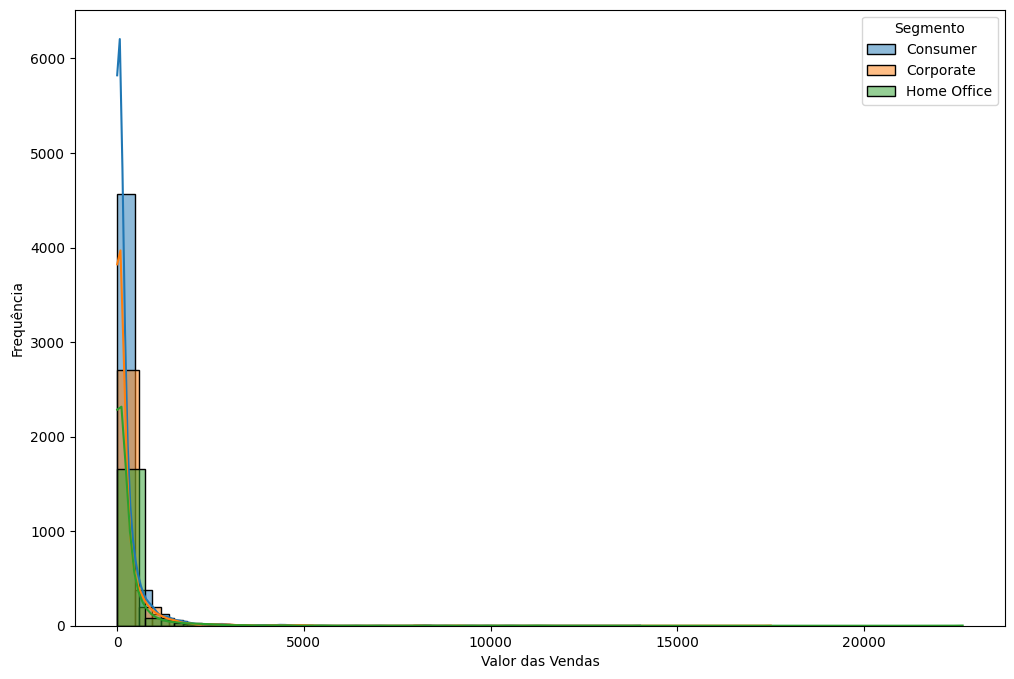

In [90]:
#histograma dos segmentos
plt.figure(figsize=(12,8))

segments = df['Segment'].unique()

for segment in segments:
    subset=df[df['Segment'] == segment]
    sns.histplot(subset['Sales'], kde = True, label=segment, bins = 30)
plt.title('')
plt.xlabel('Valor das Vendas')
plt.ylabel('Frequência')
plt.legend(title='Segmento')
plt.show()

Histograma de Vendas por Segmento

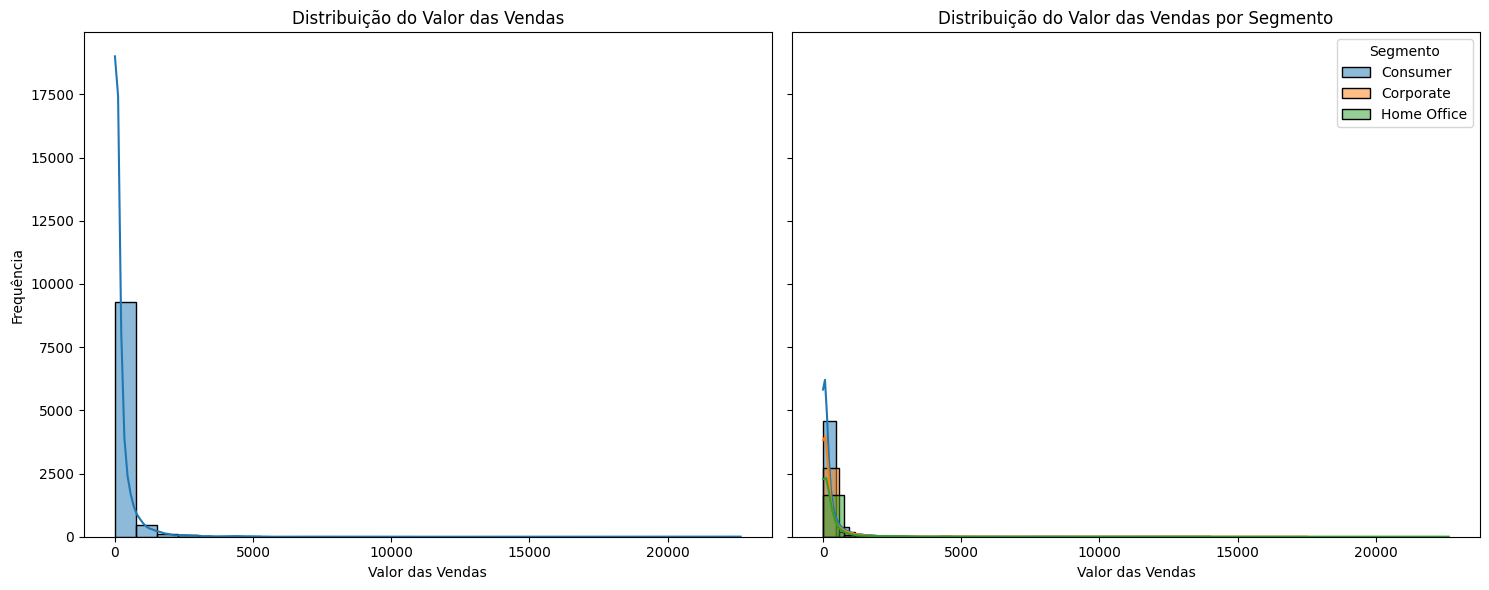

In [91]:
# Configurar os subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Histograma de Sales
sns.histplot(df['Sales'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribuição do Valor das Vendas')
axes[0].set_xlabel('Valor das Vendas')
axes[0].set_ylabel('Frequência')

# Histograma de Sales separado por Segment
segments = df['Segment'].unique()
for segment in segments:
    subset = df[df['Segment'] == segment]
    sns.histplot(subset['Sales'], kde=True, label=segment, bins=30, ax=axes[1])

axes[1].set_title('Distribuição do Valor das Vendas por Segmento')
axes[1].set_xlabel('Valor das Vendas')
axes[1].legend(title='Segmento')

plt.tight_layout()
plt.show()


Histograma de Vendas Por Segmento

C:\Users\User\AppData\Local\Temp\ipykernel_17292\165173278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Segment', palette='viridis')


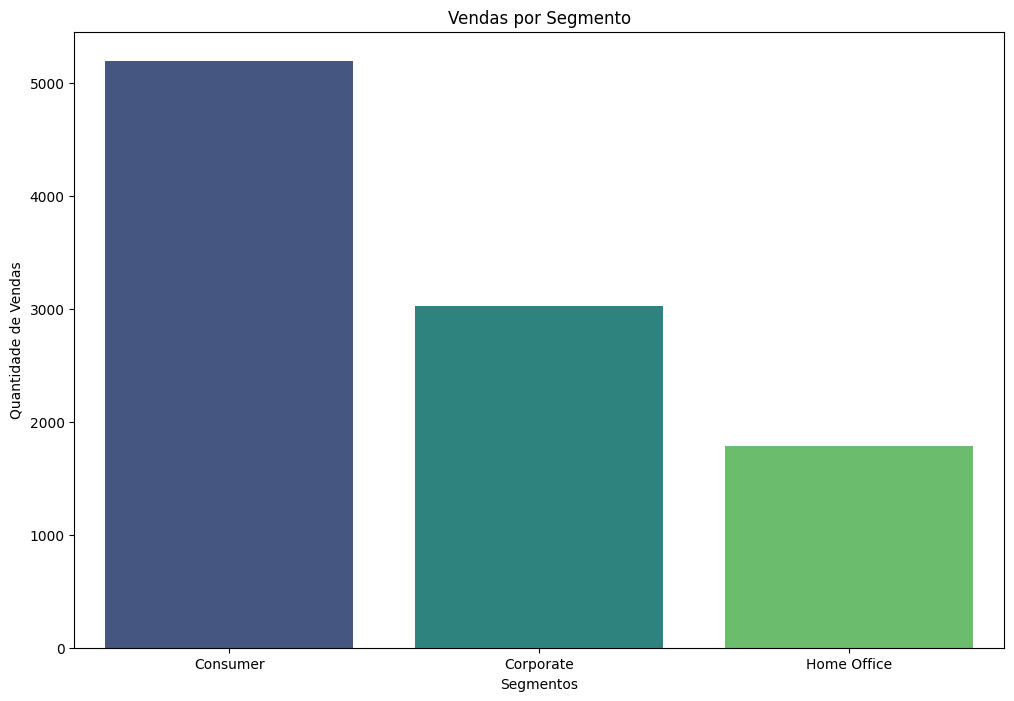

In [92]:
# Configurar o gráfico
plt.figure(figsize=(12, 8))

# Contagem de segmentos (Segment)
sns.countplot(data=df, x='Segment', palette='viridis')
plt.title('Vendas por Segmento')
plt.xlabel('Segmentos')
plt.ylabel('Quantidade de Vendas')
plt.show()

Passo III : Análise Temporal

In [93]:
#conversao da coluna de data para o formato datetime

df['Order Date'] = pd.to_datetime(df['Order Date'])

#verificacao
print(df.head())

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR

In [94]:
#removendo o espaco no título da coluna Order date

df = df.rename(columns={'Order Date': 'OrderDate'})

#criacao das colunas adicionais
df['Year']=df['OrderDate'].dt.year
df['Month']= df['OrderDate'].dt.month
df['Day']=df['OrderDate'].dt.day
df['YearMonth']=df['OrderDate'].dt.to_period('M')

#verificacao
print(df.head())

   Row ID        Order ID  OrderDate   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Sub-Category                                       Product Name     Sales  \
0    Bookcases     

Análise de Vendas Mensais

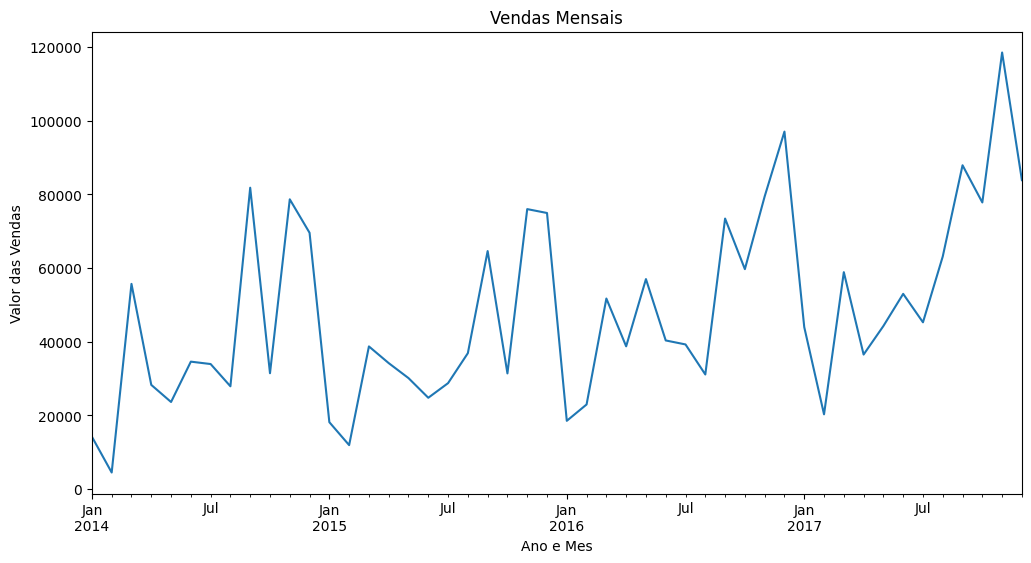

In [95]:
#agrupamento dos dados por ano e mes, e soma do valor das vendas

monthly_sales = df.groupby('YearMonth')['Sales'].sum()
#plotagem do gráfico de vendas mensais

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line')
plt.title('Vendas Mensais')
plt.xlabel('Ano e Mes')
plt.ylabel('Valor das Vendas')
plt.show()

Análise de Vendas por Segmento ao Longo do Tempo

<function matplotlib.pyplot.show(close=None, block=None)>

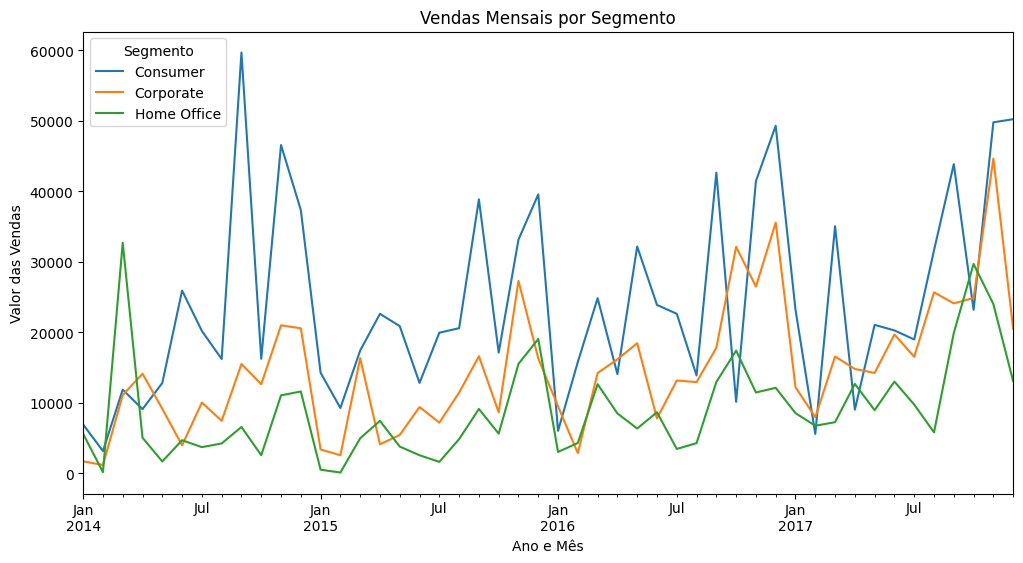

In [96]:
monthly_sales_segment=df.groupby(['YearMonth','Segment'])['Sales'].sum().unstack()
#plot do gráfico
plt.figure(figsize=(12,6))
monthly_sales_segment.plot(kind='line', ax=plt.gca())
plt.title('Vendas Mensais por Segmento')
plt.xlabel('Ano e Mês')
plt.ylabel('Valor das Vendas')
plt.legend(title='Segmento')
plt.show

Análise de Tendências Anuais

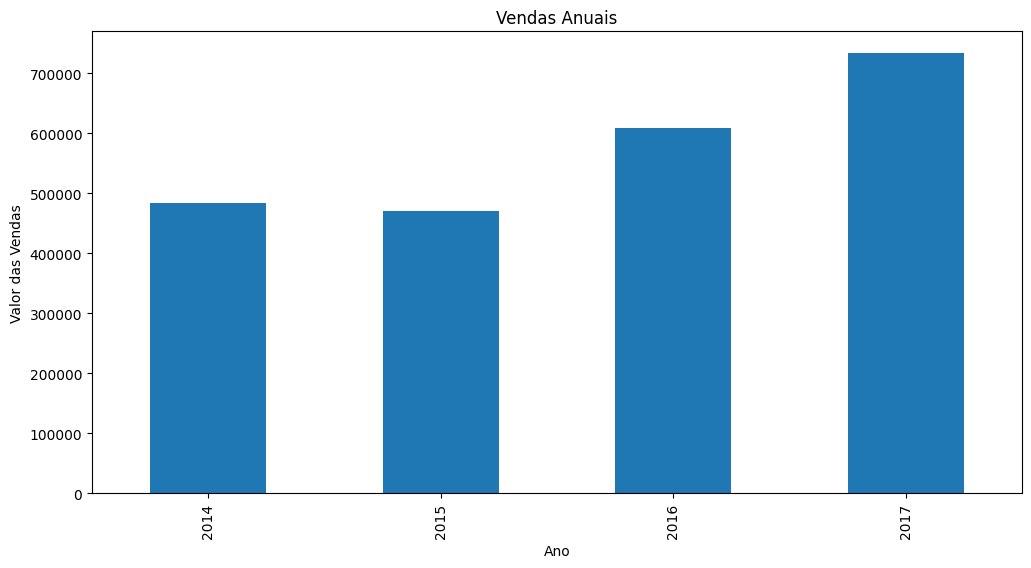

In [97]:
annual_sales=df.groupby('Year')['Sales'].sum()

#plot do gráfico
plt.figure(figsize=(12,6))
annual_sales.plot(kind='bar')
plt.title('Vendas Anuais')
plt.xlabel('Ano')
plt.ylabel('Valor das Vendas')
plt.show()

Análise de Sazonalidade Mensal

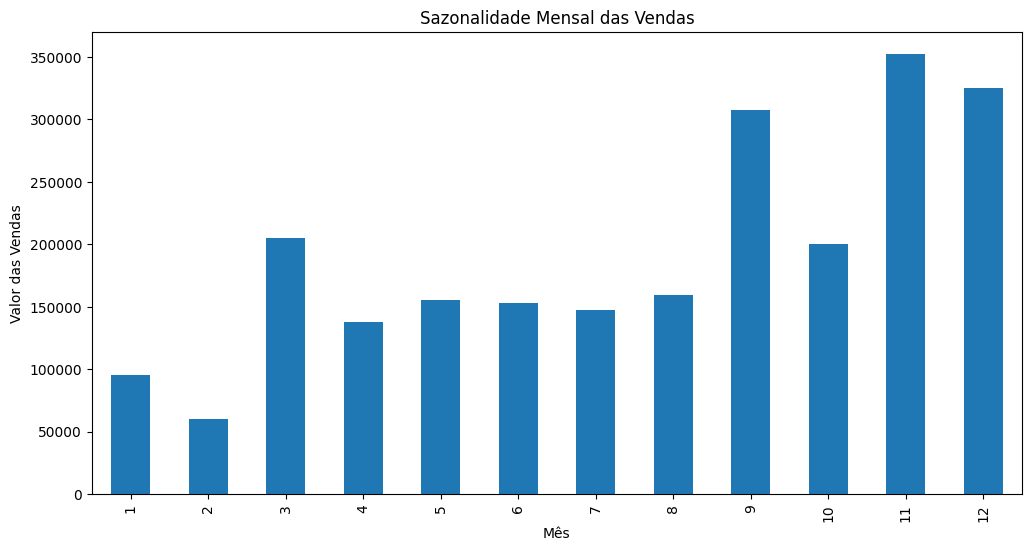

In [98]:
monthly_sales_seasonality = df.groupby('Month')['Sales'].sum()
#plot do gráfico
plt.figure(figsize=(12,6))
monthly_sales_seasonality.plot(kind='bar')
plt.title('Sazonalidade Mensal das Vendas')
plt.xlabel('Mês')
plt.ylabel('Valor das Vendas')
plt.show()